In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
training_set = pd.read_csv("training_indicators5_log.csv")
testing_set = pd.read_csv("testing_indicators5_log.csv")
y_train = training_set[["future 10t return"]].values
y_test = testing_set[["future 10t return"]].values

X_train = training_set[["delta price_t", "delta price_t-1", "delta price_t-2", "macd signal", "log spread", "mid price", "log ADX", "RSI", "open interest", "vol"]].values
X_test = testing_set[["delta price_t", "delta price_t-1", "delta price_t-2", "macd signal", "log spread", "mid price", "log ADX", "RSI", "open interest", "vol"]].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
X_train = np.delete(X_train, 0, axis=1)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     28.96
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           8.23e-55
Time:                        13:31:53   Log-Likelihood:                 22505.
No. Observations:                5483   AIC:                        -4.499e+04
Df Residuals:                    5472   BIC:                        -4.491e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.998e-06    5.4e-05     -0.185      0.8

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("explained variance ratio:", pca.explained_variance_ratio_)
print("accumulated explained variance ratio:", pca.explained_variance_ratio_.cumsum())

X_train = pd.DataFrame(X_train[:, :9])
X_test = pd.DataFrame(X_test[:, :9])
print(X_train.head())
print(X_test.head())

explained variance ratio: [0.21816 0.18343 0.1495  0.10843 0.08737 0.07909 0.06349 0.05512 0.04049
 0.01491]
accumulated explained variance ratio: [0.21816 0.40159 0.55109 0.65952 0.7469  0.82599 0.88947 0.9446  0.98509
 1.     ]
          0         1         2         3         4         5         6  \
0  0.056560 -0.680173  0.177007 -0.498736  0.705884 -0.225562 -0.134858   
1  0.109238 -0.686699  0.153025  0.102160  0.727262  0.045429  0.210993   
2  0.866926 -0.818537  0.407264  0.502334  0.538485 -0.324561  0.247353   
3  0.578614 -0.795173  0.075642 -0.489552  0.260510  0.640272  0.527508   
4  0.228164 -0.745141 -0.169318 -0.783979  0.100595 -0.627673 -0.017027   

          7         8  
0  0.904993  0.402796  
1  0.437231  0.324697  
2  0.511147  0.062717  
3  0.240279  0.119850  
4  0.301270  0.175654  
          0         1         2         3         4         5         6  \
0 -0.977188 -0.121847  1.351648  1.173001  2.428540  0.485808 -0.478703   
1  0.248161 -0.397720  1.

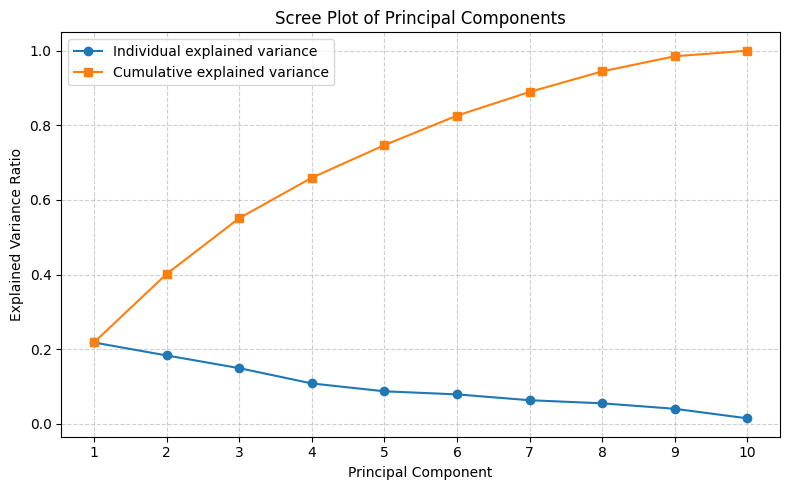

In [ ]:
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

# --- 畫碎石圖（Scree Plot） ---
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', label='Individual explained variance')
plt.plot(range(1, len(cum_explained_var)+1), cum_explained_var, marker='s', label='Cumulative explained variance')
plt.title('Scree Plot of Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_var)+1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
X_train = np.delete(X_train, 0, axis=1)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     31.21
Date:                Sat, 08 Nov 2025   Prob (F-statistic):           8.07e-54
Time:                        13:30:58   Log-Likelihood:                 22500.
No. Observations:                5483   AIC:                        -4.498e+04
Df Residuals:                    5473   BIC:                        -4.491e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.998e-06    5.4e-05     -0.185      0.8

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8
0,-0.977188,-0.121847,1.351648,1.173001,2.428540,0.485808,-0.478703,0.701470,1.107773
1,0.248161,-0.397720,1.700426,-0.074252,1.668182,1.229448,-0.559008,1.108120,0.844471
2,0.166306,-0.407036,1.388058,-1.798896,1.253064,0.723854,-0.597831,1.086939,0.758436
3,-0.750376,-0.231721,0.963874,-1.850509,1.503862,-0.021945,-0.428283,0.399436,0.877069
4,-1.207864,-0.160047,0.921406,-0.659151,1.856785,-0.237390,-0.390809,-0.151399,1.055139
...,...,...,...,...,...,...,...,...,...
1915,-3.572816,0.312635,-0.604844,0.134490,1.239802,1.594906,0.088501,-0.376251,0.202440
1916,-2.009913,0.026167,0.221894,0.916815,0.967701,-0.877002,-1.445267,1.112034,0.114838
1917,-1.903630,-0.030203,0.421265,0.260770,0.980672,2.436302,-0.188196,0.397276,0.018368
1918,-0.700852,-0.257123,0.809519,-0.311490,0.489415,-0.677801,-1.693780,1.671210,-0.015213


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([[-0.00015, -0.0003 , -0.00018, -0.00043,  0.00049, -0.00034,
        -0.0002 ,  0.00056,  0.00021,  0.00012]])

In [ ]:
y_pred = regressor.predict(X_test)
y_pred = np.where(np.isinf(y_pred), np.mean(y_test), y_pred)
y_pred = np.where(y_pred>1, np.mean(y_test), y_pred)
y_pred = np.where(y_pred<-1, np.mean(y_test), y_pred)
np.set_printoptions(precision=5)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[-1.11581e-03 -1.71179e-03]
 [-1.52226e-03 -2.48069e-03]
 [-1.50532e-03 -1.41337e-03]
 ...
 [-4.41279e-04  1.15793e-04]
 [-4.62267e-04 -1.46614e-03]
 [-5.26245e-04  2.89050e-05]]


In [ ]:
y_pred = np.expm1(y_pred)
y_pred

array([[-0.00112],
       [-0.00152],
       [-0.0015 ],
       ...,
       [-0.00044],
       [-0.00046],
       [-0.00053]])

In [ ]:
import yfinance as yf

ticker = "^TNX"
data = yf.download(ticker, period="1y")

risk_free_rate = data['Close'].iloc[-1] / 100
risk_free_rate = risk_free_rate["^TNX"]/121

/tmp/ipython-input-3789647642.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


In [ ]:
risk_free_rate

np.float64(0.0003382644574504253)

In [ ]:
data = pd.read_csv("training_data.csv")
df = data.copy()
price_plt = df.iloc[::5, :].reset_index(drop=True)

fee = 0.0005
ATR = training_set["ATR%"]

def backtest(TP, SL):
    position = ""
    initial_price = 0
    total_ret = []

    for i in range(len(y_pred)):
        if position == "":
            if y_pred[i] > 1*fee:
                position = "long"
                initial_price = price_plt["close"][i]

            elif y_pred[i] < -1*fee:
                position = "short"
                initial_price = price_plt["close"][i]

        elif position == "long":
            end_price = price_plt["close"][i]
            pos_return = (end_price * (1 - fee) / initial_price * (1 + fee)) - 1
            if (pos_return >= TP * ATR[i]) or (pos_return <= -SL * ATR[i]):
                position = ""
                total_ret.append(pos_return)

        elif position == "short":
            end_price = price_plt["close"][i]
            pos_return = 1 - (end_price * (1 + fee) / initial_price * (1 - fee))
            if (pos_return >= TP * ATR[i]) or (pos_return <= -SL * ATR[i]):
                position = ""
                total_ret.append(pos_return)

    if len(total_ret) == 0:
        return -np.inf

    ret = np.mean(total_ret)
    vol = np.std(total_ret)
    if vol == 0:
        return -np.inf

    sharpe = ((((1 + ret) ** 121) - 1) - risk_free_rate) / (vol * np.sqrt(121))
    return sharpe

In [ ]:
from tqdm import tqdm  # 顯示進度條

best_SR = -np.inf
best_TP, best_SL = 0, 0

TP_range = np.arange(0.5, 3.1, 0.1)
SL_range = np.arange(0.5, 3.1, 0.1)

for TP in tqdm(TP_range, desc="Searching TP"):
    for SL in SL_range:
        SR = backtest(TP, SL)
        if SR > best_SR:
            best_SR = SR
            best_TP, best_SL = TP, SL

Searching TP: 100%|██████████| 26/26 [00:08<00:00,  2.89it/s]


In [ ]:
print(f"\nbest TP: {best_TP:.2f}\nbest SL: {best_SL:.2f}\nmax Sharpe Ratio: {best_SR:.4f}")


best TP: 1.80
best SL: 1.20
max Sharpe Ratio: 1.7702


In [ ]:
data = pd.read_csv("testing_data.csv")
df = data.copy()
price_plt = df.iloc[::5, :].reset_index(drop=True)
ATR = testing_set["ATR%"]

position = ""
initial_price = 0
end_price = 0
pos_return = 0
total_ret = []

long_entries = []
short_entries = []
exits = []

TP = best_TP
SL = best_SL

for i in range(len(y_pred)):
    if position == "":
        if (y_pred[i] > 1*fee):
            position = "long"
            initial_price = price_plt["close"][i]
            long_entries.append((i, initial_price))

        elif (y_pred[i] < -1*fee):
            position = "short"
            initial_price = price_plt["close"][i]
            short_entries.append((i, initial_price))

    elif position == "long":
        end_price = price_plt["close"][i]
        pos_return = (end_price * (1-fee) / initial_price * (1+fee)) - 1
        if (pos_return >= TP*ATR[i]) or (pos_return <= -SL*ATR[i]):
            position = ""
            initial_price = 0
            total_ret.append(pos_return)
            exits.append((i, end_price))

    elif position == "short":
        end_price = price_plt["close"][i]
        pos_return = 1 - (end_price  * (1+fee)/ initial_price * (1-fee))
        if (pos_return >= TP*ATR[i]) or (pos_return <= -SL*ATR[i]):
            position = ""
            initial_price = 0
            total_ret.append(pos_return)
            exits.append((i, end_price))


In [ ]:
ret = np.mean(total_ret)
# for r in total_ret:
#     ret *= (1+r)
# ret -= 1
print("average return:", ret)

vol = np.std(total_ret)
print("standard deviation:", vol)

sharp_ratio = ((((1+ret)**121)-1)-risk_free_rate)/(vol*np.sqrt(121))
print("sharp ratio:", sharp_ratio)

average return: 0.0001730669783891058
standard deviation: 0.0011866781294991389
sharp ratio: 1.5951168601409846


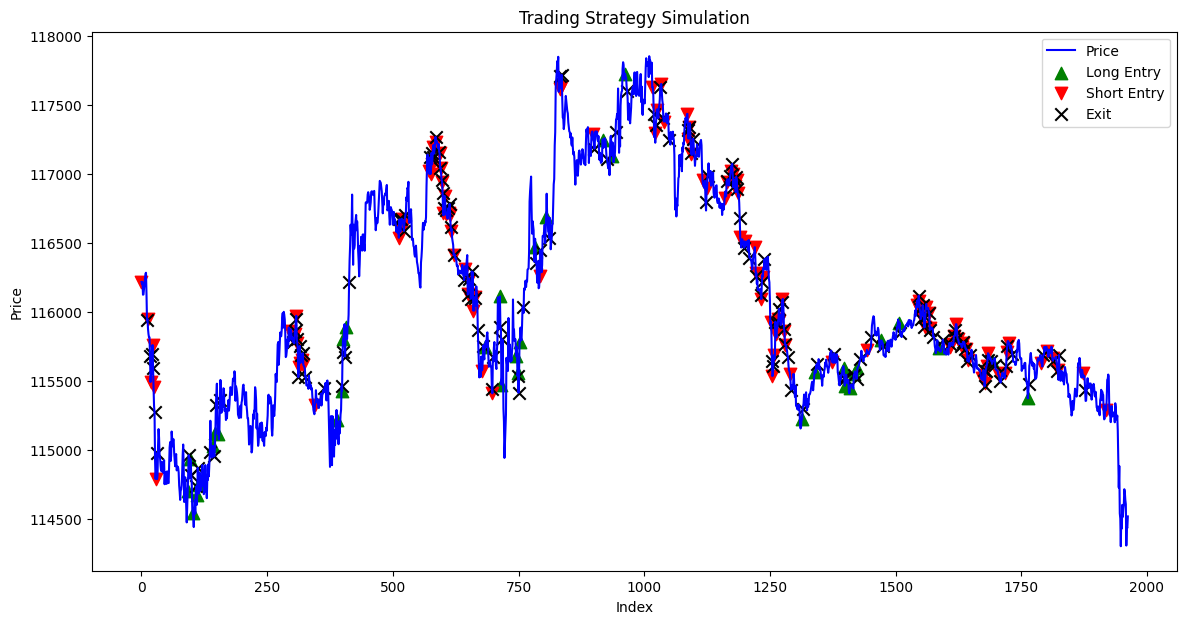

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(price_plt["close"], label="Price", color="blue")

plt.scatter([x[0] for x in long_entries], [x[1] for x in long_entries],
            color="green", marker="^", s=80, label="Long Entry")

plt.scatter([x[0] for x in short_entries], [x[1] for x in short_entries],
            color="red", marker="v", s=80, label="Short Entry")

plt.scatter([x[0] for x in exits], [x[1] for x in exits],
            color="black", marker="x", s=80, label="Exit")

plt.legend()
plt.title("Trading Strategy Simulation")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

In [ ]:
for ret in total_ret:
    print(1+ret)

1.0024018757354125
1.0016994765606781
0.9981014259128016
1.0012201155227687
1.0022270063271175
0.9970125377726502
1.0024766724613756
1.0006646091689777
1.000923078465023
1.0007760070172922
1.0007038453958614
0.9989732668173357
1.0005488808453216
1.0007645537311227
1.0008704172011256
1.001321484727607
1.0024627145296696
0.9953965364419359
0.9956523421358513
0.9976949352479975
0.9975058413259583
1.0009801850090816
1.0011623564444285
0.9990585407918608
0.9992070897939314
1.000830164322436
1.0003939677548923
1.0003686602008037
1.0006254060039592
1.001157985937024
0.9984420886129839
0.9988021583450597
1.0006374082983234
1.000626821401535
1.0005381323764007
0.9993507868577323
1.0003777623884882
1.0006323525120504


In [ ]:
print(sum(1 for ret in total_ret if ret > 0))
print(sum(1 for ret in total_ret if ret < 0))

26
12


In [ ]:
print(sum(1 for pred in y_pred if pred > 1*fee))
print(sum(1 for pred in y_pred if pred < -1*fee))

77
403


In [ ]:
len(y_pred)

1920